In [1]:
#Supervised regression:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
#Data analysis and model eval:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [3]:
#Deep learning:
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import SGD 
from keras.layers import LSTM
from scikeras.wrappers import KerasClassifier

In [4]:
#Time series analyis:
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm

In [5]:
#Data prep and vis:
import numpy as np
import pandas as pd
import yfinance as yf
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [6]:
!pip install yfinance

In [7]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

stk_data = yf.download(stk_tickers)
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

[*********************100%%**********************]  3 of 3 completed


In [8]:
stk_data.head()


Price      Adj Close                Close                 High                 \
Ticker         GOOGL       IBM MSFT GOOGL       IBM MSFT GOOGL       IBM MSFT   
Date                                                                            
1962-01-02       NaN  1.541711  NaN   NaN  7.291268  NaN   NaN  7.374124  NaN   
1962-01-03       NaN  1.555187  NaN   NaN  7.355003  NaN   NaN  7.355003  NaN   
1962-01-04       NaN  1.539689  NaN   NaN  7.281708  NaN   NaN  7.355003  NaN   
1962-01-05       NaN  1.509367  NaN   NaN  7.138305  NaN   NaN  7.272148  NaN   
1962-01-08       NaN  1.481068  NaN   NaN  7.004461  NaN   NaN  7.131931  NaN   

Price        Low                 Open                Volume               
Ticker     GOOGL       IBM MSFT GOOGL       IBM MSFT  GOOGL     IBM MSFT  
Date                                                                      
1962-01-02   NaN  7.291268  NaN   NaN  7.374124  NaN    NaN  407940  NaN  
1962-01-03   NaN  7.291268  NaN   NaN  7.291268  NaN    NaN  305955  NaN  
1962-01-04   NaN  7.278521  NaN   NaN  7.355003  NaN    NaN  274575  NaN  
1962-01-05   NaN  7.125558  NaN   NaN  7.272148  NaN    NaN  384405  NaN  
1962-01-08   NaN  6.947100  NaN   NaN  7.131931  NaN    NaN  572685  NaN

In [9]:
stk_data2 = stk_data.truncate(before='2010-01-01')

In [10]:
stk_data2.head()

Price       Adj Close                            Close                         \
Ticker          GOOGL        IBM       MSFT      GOOGL         IBM       MSFT   
Date                                                                            
2010-01-04  15.684434  76.767433  23.431587  15.684434  126.625237  30.950001   
2010-01-05  15.615365  75.840073  23.439156  15.615365  125.095604  30.959999   
2010-01-06  15.221722  75.347427  23.295315  15.221722  124.282982  30.770000   
2010-01-07  14.867367  75.086586  23.053051  14.867367  123.852776  30.450001   
2010-01-08  15.065566  75.840073  23.212034  15.065566  125.095604  30.660000   

Price            High                               Low              \
Ticker          GOOGL         IBM       MSFT      GOOGL         IBM   
Date                                                                  
2010-01-04  15.753504  127.122368  31.100000  15.621622  125.095604   
2010-01-05  15.711712  126.051628  31.100000  15.554054  124.378586   
2010-01-06  15.662162  125.707458  31.080000  15.174174  124.101341   
2010-01-07  15.265265  124.521988  30.700001  14.831081  123.240921   
2010-01-08  15.096346  125.162521  30.879999  14.742492  123.374763   

Price                       Open                              Volume           \
Ticker           MSFT      GOOGL         IBM       MSFT        GOOGL      IBM   
Date                                                                            
2010-01-04  30.590000  15.689439  125.411087  30.620001   78169752.0  6438444   
2010-01-05  30.639999  15.695195  125.889099  30.850000  120067812.0  7156104   
2010-01-06  30.520000  15.662162  124.933075  30.879999  158988852.0  5863144   
2010-01-07  30.190001  15.250250  124.158699  30.629999  256315428.0  6109268   
2010-01-08  30.240000  14.814815  123.393883  30.280001  188783028.0  4390271   

Price                   
Ticker            MSFT  
Date                    
2010-01-04  38409100.0  
2010-01-05  49749600.0  
2010-01-06  58182400.0  
2010-01-07  50559700.0  
2010-01-08  51197400.0

In [11]:
return_period = 5
Y = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period).shift(-return_period)
Y.name = Y.name[-1]+'_pred'

X1 = np.log(stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)

In [12]:
X4 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(i) for i in [return_period, return_period*3,return_period*6, return_period*12]], axis=1).dropna()
X4.columns = ['MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']

In [13]:
X = pd.concat([X1, X2, X3, X4], axis=1)

In [14]:
dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

In [15]:
dataset.head()

,MSFT_pred,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2019-03-22,0.007575,0.014471,0.000143,-0.016356,-0.004453,-0.007743,-0.013497,0.246472,0.009787,0.039381,0.110334,0.222186
2019-03-29,0.016398,-0.025801,0.011763,0.008347,-0.014247,0.011957,0.016580,-0.184022,0.007575,0.065070,0.102544,0.158130
2019-04-05,0.008803,0.028943,0.015332,0.009263,-0.001690,0.020374,0.018960,-0.067119,0.016398,0.033760,0.077315,0.143852
2019-04-12,0.022967,0.009268,0.007440,0.002593,0.005825,0.005059,-0.000480,-0.065267,0.008803,0.032776,0.072157,0.142066
2019-04-22,0.047419,0.025061,-0.038559,-0.000536,-0.009353,0.000822,0.004775,0.008084,0.022967,0.048168,0.113238,0.157282


<Axes: title={'center': 'Correlation Matrix'}>

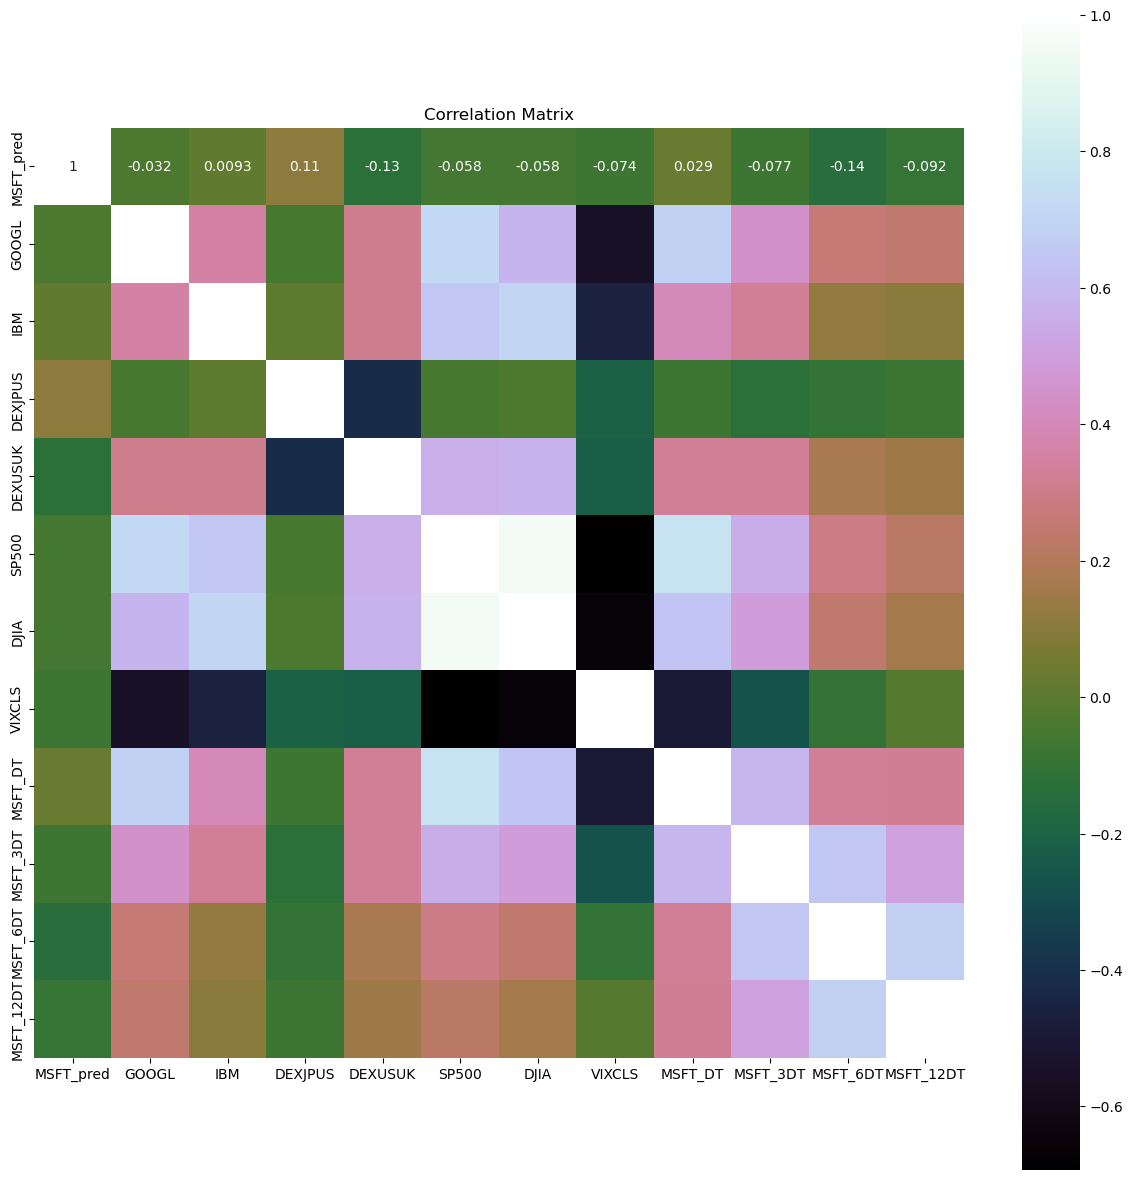

In [16]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

<Figure size 1500x1500 with 0 Axes>

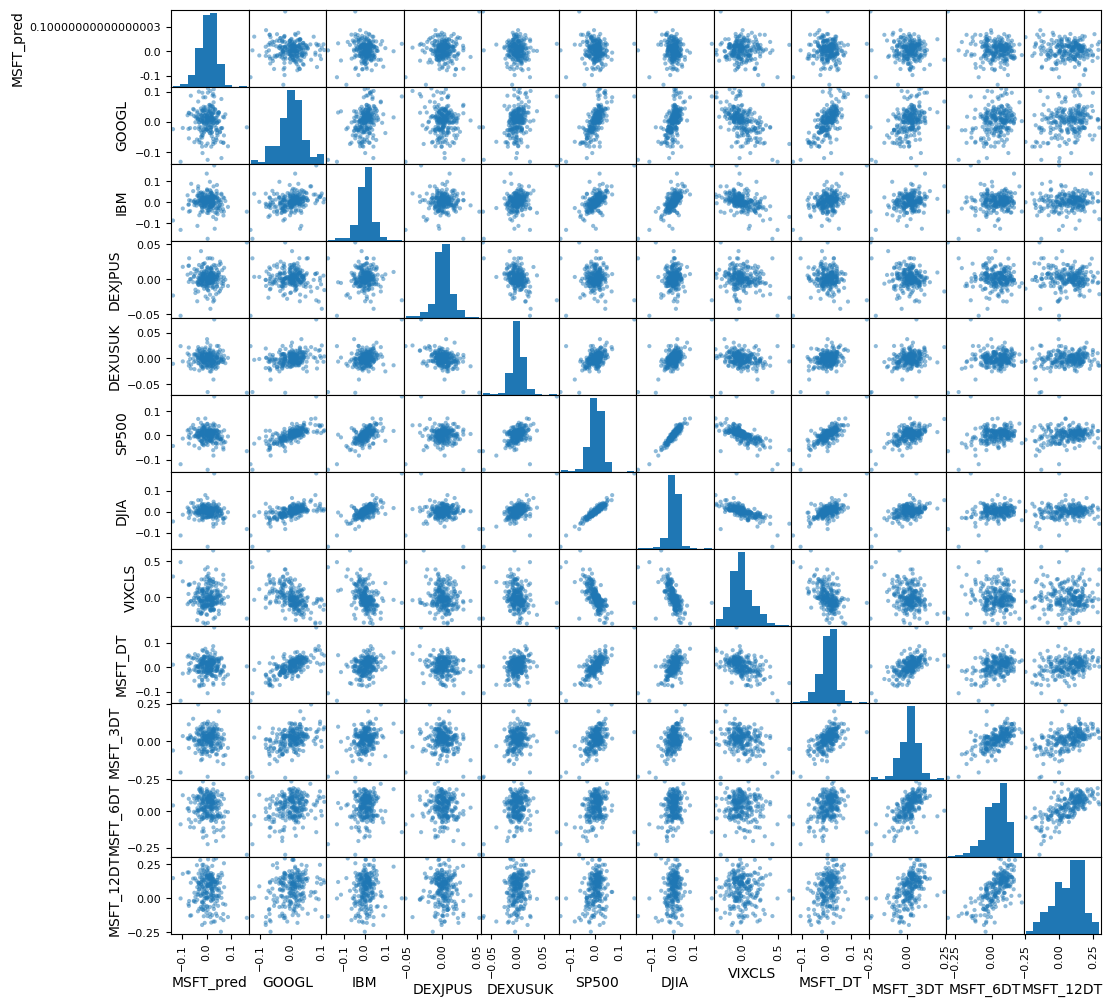

In [17]:
pyplot.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12))
pyplot.show()

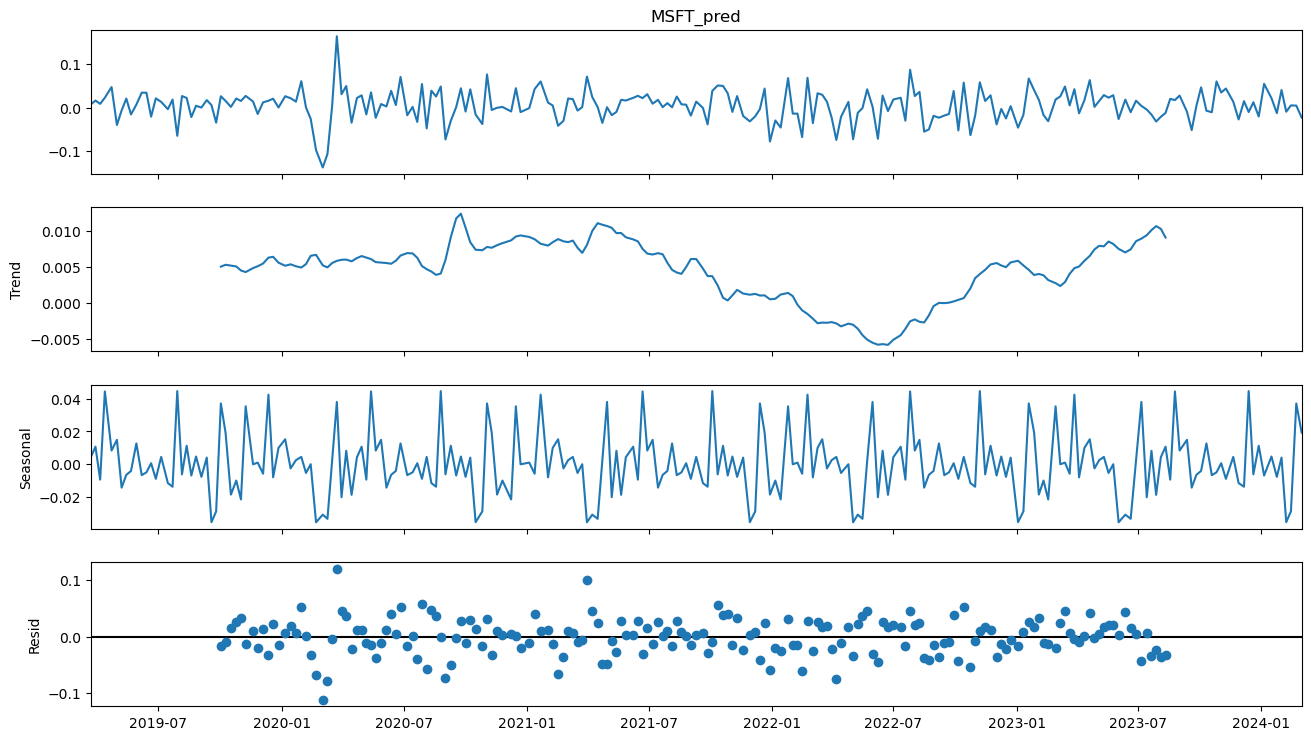

In [18]:
res = sm.tsa.seasonal_decompose(Y,period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

In [21]:
validation_size = 0.2
train_size = int(len(X) * (1 - validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [22]:
num_folds = 10
scoring = 'neg_mean_squared_error'

In [23]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [24]:
models.append(('MLP', MLPRegressor()))

In [25]:
models.append(('ABR', AdaBoostRegressor())) 
models.append(('GBR', GradientBoostingRegressor())) 
models.append(('RFR', RandomForestRegressor())) 
models.append(('ETR', ExtraTreesRegressor()))

In [30]:
names = []
kfold_results = []
test_results = []
train_results = []
seed=13
for name, model in models:
    names.append(name)
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = -1 * cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train) 
    train_results.append(train_result)
    test_result = mean_squared_error(res.predict(X_test), Y_test) 
    test_results.append(test_result)

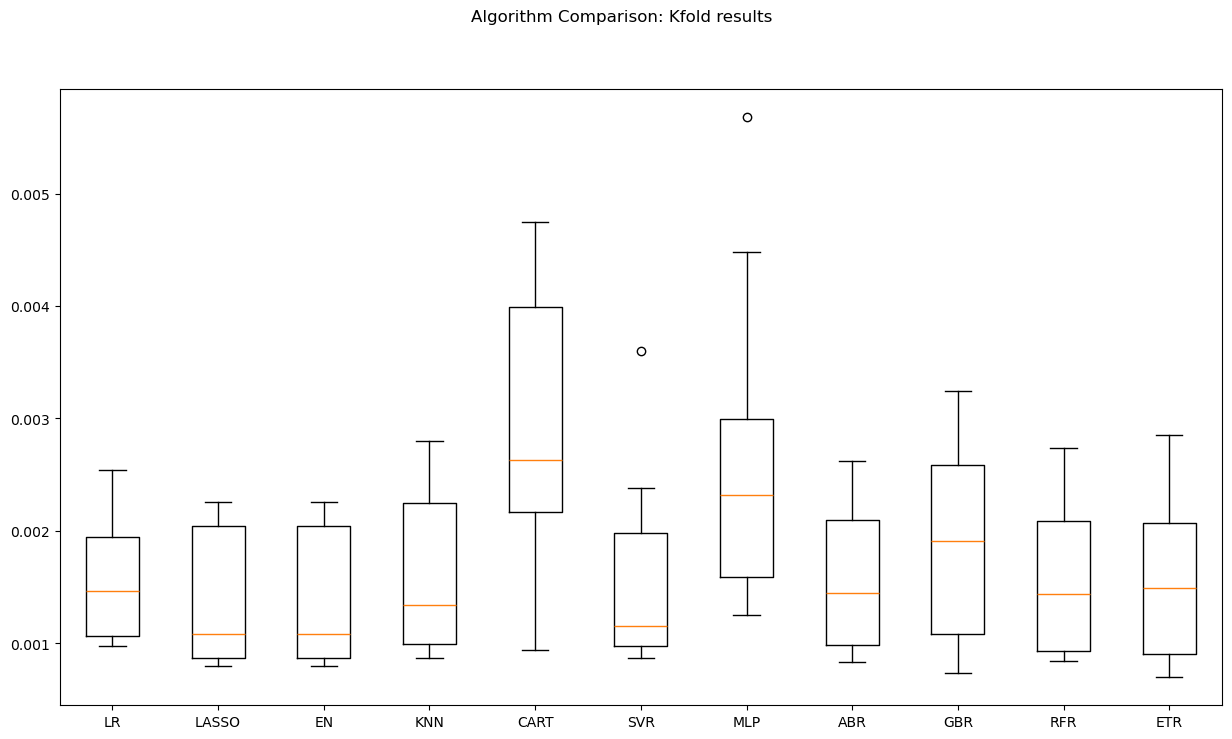

In [31]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

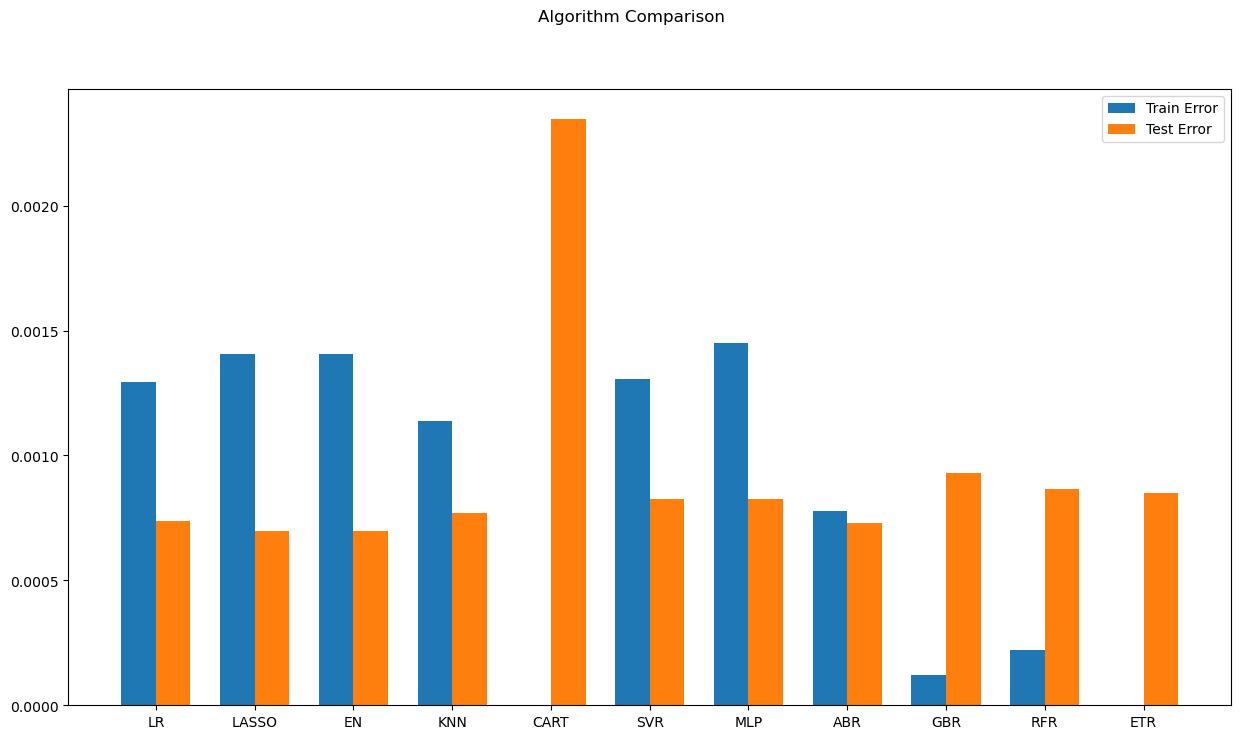

In [32]:
# compare algorithms
fig = pyplot.figure()
ind = np.arange(len(names))
width = 0.35 
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
#From above, adaboost regressor has the best performance. Train one and plot results:

Mean Squared Error: 0.0007356830243565662


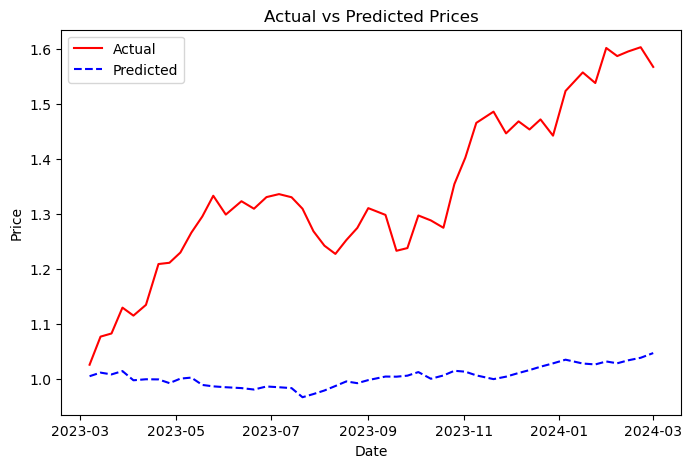

In [56]:
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, Y_train)

predictions = ada_model.predict(X_test)

mse = mean_squared_error(Y_test, predictions)
print("Mean Squared Error:", mse)

pyplot.plot(Y_test.index, np.exp(Y_test).cumprod(), 'r', label='Actual')
pyplot.plot(Y_test.index, np.exp(predictions).cumprod(), 'b--', label='Predicted')
pyplot.xlabel('Date')
pyplot.ylabel('Price')
pyplot.title('Actual vs Predicted Prices')
pyplot.legend()
pyplot.show()

In [ ]:
#Despite metrics, ABR underperforms. Try ARIMA:

In [33]:
X_train_ARIMA=X_train.loc[:, ['GOOGL', 'IBM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]
X_test_ARIMA=X_test.loc[:, ['GOOGL', 'IBM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

In [35]:
model_ARIMA = ARIMA(endog=Y_train, exog=X_train_ARIMA, order=[1, 0, 0])
model_fit = model_ARIMA.fit()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


0.0006669800931459134

In [ ]:
#Also want to try an LSTM:

In [37]:
seq_len = 2
Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test) 
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1])) 
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]


In [41]:
# LSTM Network
def create_LSTMmodel(learn_rate=0.01, momentum=0.0): 
    # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    model.add(Dense(1))
    optimizer = SGD(learning_rate=learn_rate, momentum=momentum)  # Change lr to learning_rate
    model.compile(loss='mse', optimizer='adam') 
    return model

LSTMModel = create_LSTMmodel(learn_rate = 0.01, momentum=0.0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM), epochs=330, batch_size=72, verbose=0, shuffle=False)

2024-03-13 20:44:25.196709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


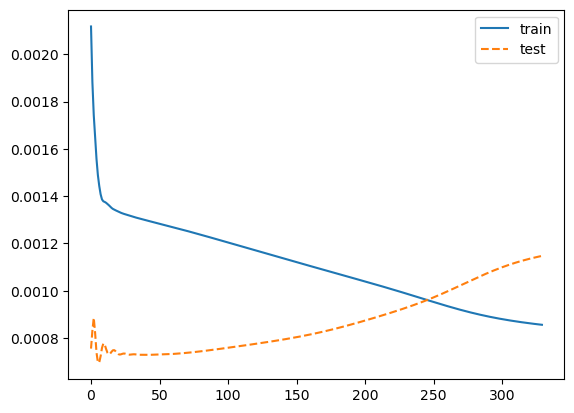

In [42]:
pyplot.plot(LSTMModel_fit.history['loss'], label='train', )
pyplot.plot(LSTMModel_fit.history['val_loss'], '--',label='test',)
pyplot.legend()
pyplot.show()

In [43]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [45]:
test_results.append(error_Test_ARIMA)
test_results.append(error_Test_LSTM)
train_results.append(error_Training_ARIMA)
train_results.append(error_Training_LSTM)
names.append("ARIMA")
names.append("LSTM")

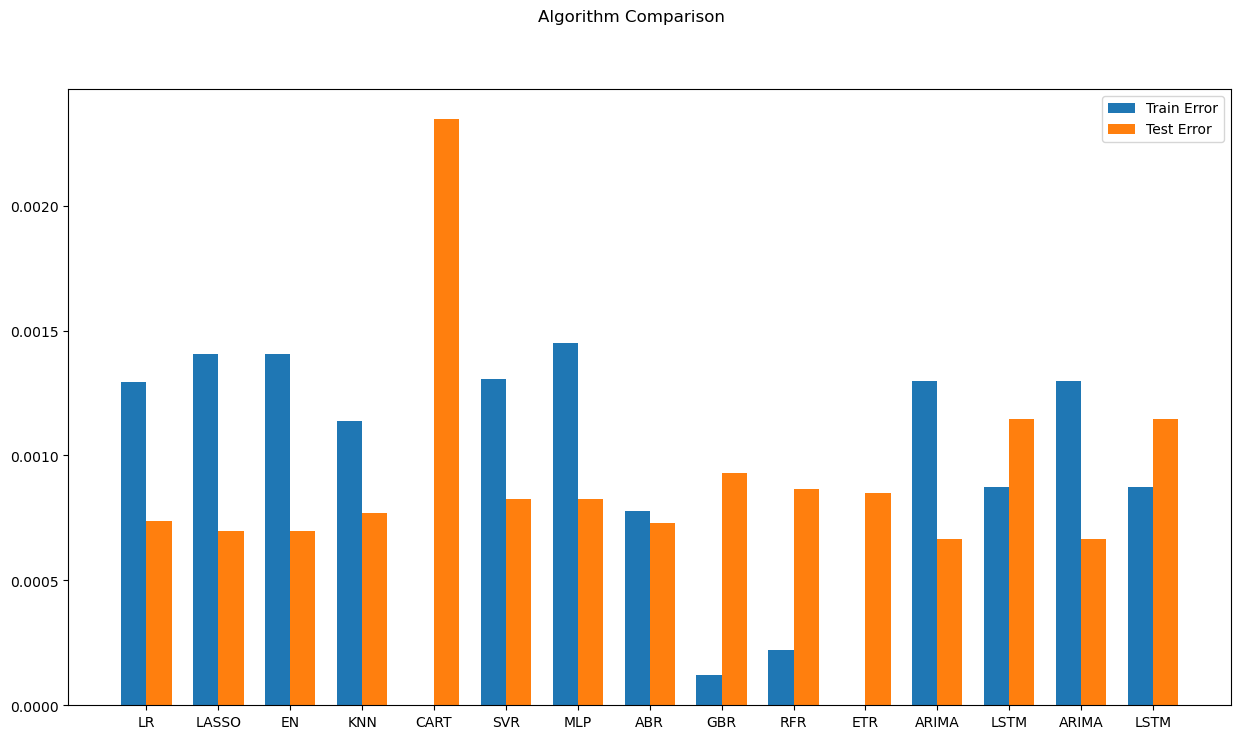

In [46]:
# compare algorithms
fig = pyplot.figure()
ind = np.arange(len(names)) 
width = 0.35 
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
#Perform further refinements to ARIMA:

In [48]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def evaluate_arima_model(Y_train, X_train_ARIMA, arima_order):
    try:
        modelARIMA = ARIMA(endog=Y_train, exog=X_train_ARIMA, order=arima_order)
        model_fit = modelARIMA.fit()
        
        error = mean_squared_error(Y_train, model_fit.fittedvalues)
        return error
    except:
        return None

def evaluate_models(Y_train, X_train_ARIMA, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                mse = evaluate_arima_model(Y_train, X_train_ARIMA, order)
                if mse is not None and mse < best_score:
                    best_score, best_cfg = mse, order
                print('ARIMA%s MSE=%.7f' % (order, mse))
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))

p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)

warnings.filterwarnings("ignore")

evaluate_models(Y_train, X_train_ARIMA, p_values, d_values, q_values)


ARIMA(0, 0, 0) MSE=0.0013538
ARIMA(0, 0, 1) MSE=0.0013086
ARIMA(0, 1, 0) MSE=0.0018529
ARIMA(0, 1, 1) MSE=0.0013803
ARIMA(1, 0, 0) MSE=0.0012992
ARIMA(1, 0, 1) MSE=0.0013007
ARIMA(1, 1, 0) MSE=0.0017868
ARIMA(1, 1, 1) MSE=0.0013270
ARIMA(2, 0, 0) MSE=0.0012951
ARIMA(2, 0, 1) MSE=0.0013045
ARIMA(2, 1, 0) MSE=0.0017254
ARIMA(2, 1, 1) MSE=0.0012967
Best ARIMA(2, 0, 0) MSE=0.0012951


In [49]:
modelARIMA_tuned=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[2,0,0])
model_fit_tuned = modelARIMA_tuned.fit()
predicted_tuned = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

0.0006669800931459134


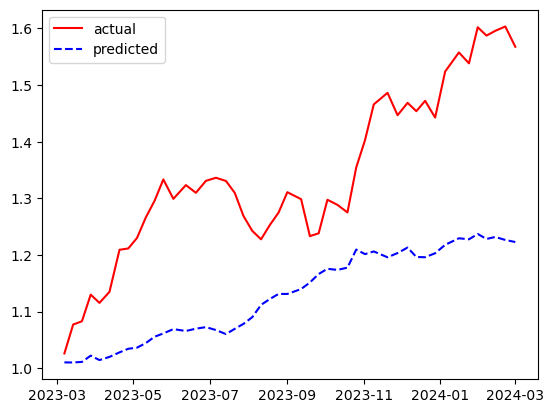

In [50]:
#Plotting the results
predicted_tuned.index = Y_test.index
pyplot.plot(np.exp(Y_test).cumprod(), 'r', label='actual',)
pyplot.plot(np.exp(predicted_tuned).cumprod(), 'b--', label='predicted')
pyplot.legend()
pyplot.rcParams["figure.figsize"] = (8,5)
pyplot.show()

In [ ]:
#ARIMA performs decent. Now I compare all models in one plot:

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


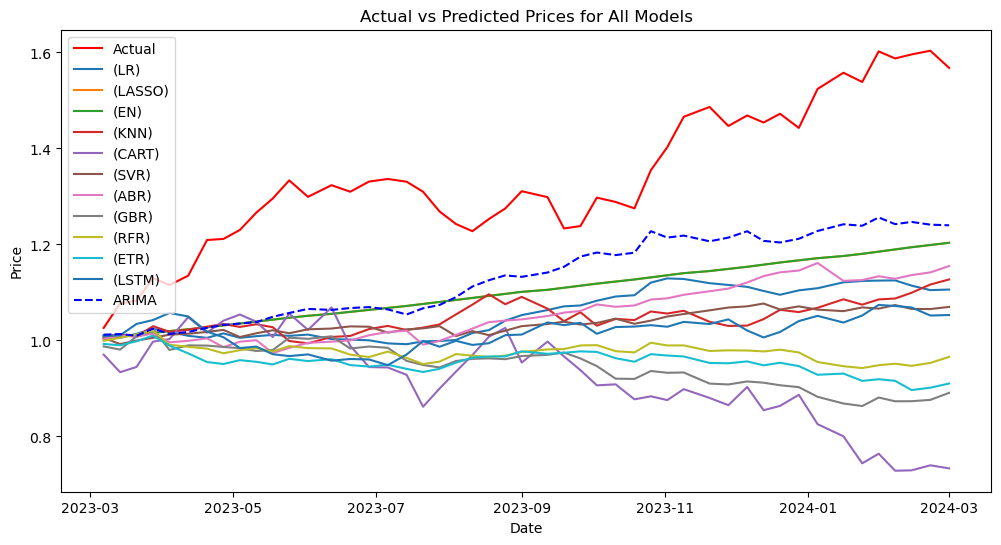

In [84]:
predictions_dict = {}
for name, model in models:

    if name == 'MLP':
        continue
        
    model.fit(X_train, Y_train)
    
    predictions = model.predict(X_test)
    
    predictions_dict[name] = predictions

#ARIMA 
modelARIMA_tuned=ARIMA(endog=Y_train, exog=X_train_ARIMA, order=[2,0,0])
model_fit_tuned = modelARIMA_tuned.fit()
predicted_arima = model_fit_tuned.predict(start=tr_len-1, end=to_len-1, exog=X_test_ARIMA)[1:]

#LSTM 
LSTMModel = create_LSTMmodel(learn_rate = 0.01, momentum=0.0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM), epochs=330, batch_size=72, verbose=0, shuffle=False)
predicted_lstm = LSTMModel.predict(X_test_LSTM)
predictions_dict['LSTM'] = predicted_lstm 

plt.figure(figsize=(12, 6))
plt.plot(Y_test.index, np.exp(Y_test).cumprod(), 'r', label='Actual')

for name, predictions in predictions_dict.items():
    plt.plot(Y_test.index, np.exp(predictions).cumprod(), label=f'({name})')

plt.plot(Y_test.index, np.exp(predicted_arima).cumprod(), 'b--', label='ARIMA')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices for All Models')
plt.legend() 
plt.show()


In [ ]:
#Future work: improvements can be made by utilising momentum and trend indicators. LSTM can be further improved
#by performing basic grid search. 